In [27]:
!pip install pandas numpy plotly
# %matplotlib widget

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pylab
from matplotlib.pyplot import savefig
import statistics as st
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\lily xie\Desktop\BOLT\store.csv", skiprows=0)

In [4]:
data.head()
# len(data.index)
#0-9 are all 61863, no missing values!
# data[data.columns[0]].count()
# data.columns[5].nunique()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Operational_Cost,Customer_Age
0,0,02/01/2022,3686,3,Skirt,CZUZX,1.0,63.5,44.6,51
1,1,02/01/2022,3719,4,Skirt,549KK,1.0,55.9,41.1,27
2,2,02/01/2022,9200,5,Skirt,K8EHH,1.0,68.8,52.6,39
3,3,02/01/2022,1666,7,Shoes,AHZNS,1.0,82.1,56.7,39
4,4,02/01/2022,1253,8,Skirt,9STQJ,1.0,82.5,58.7,30


In [31]:
px.line(data, x="Customer_Age", y="Sales_Amount", color="SKU_Category")

Text(0, 0.5, 'Quantity (Number of Items Sold)')

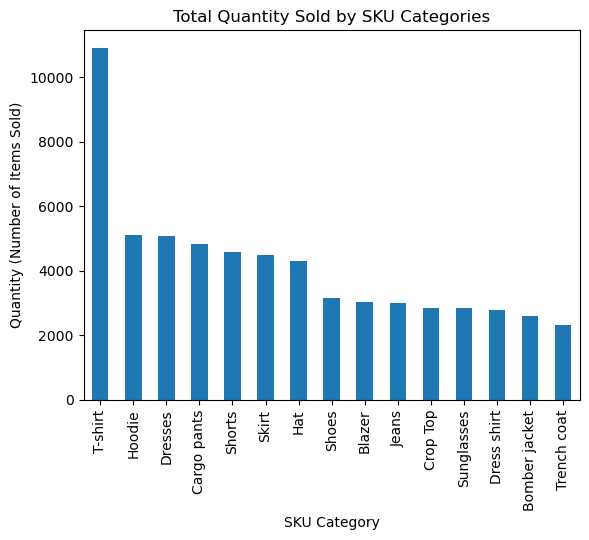

In [32]:
#
descending_sku = data.groupby("SKU_Category").size().sort_values(ascending=False)
descending_sku
descending_sku.reset_index()
descending_sku.plot.bar()
plt.title("Total Quantity Sold by SKU Categories")
plt.xlabel("SKU Category")
plt.ylabel("Quantity (Number of Items Sold)")

Text(0, 0.5, 'Quantity (Number of Items Sold)')

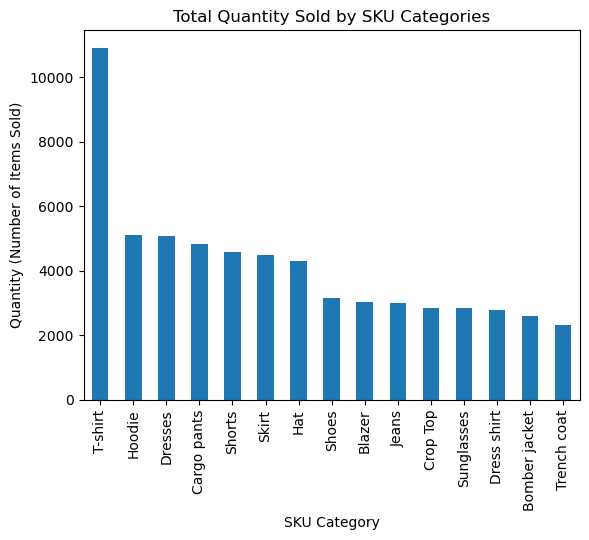

In [33]:
#
descending_sku = data.groupby("SKU_Category").size().sort_values(ascending=False)
descending_sku
descending_sku.reset_index()
descending_sku.plot.bar()
plt.title("Total Quantity Sold by SKU Categories")
plt.xlabel("SKU Category")
plt.ylabel("Quantity (Number of Items Sold)")

In [34]:
descending_sku.reset_index()

,SKU_Category,0
0,T-shirt,10913
1,Hoodie,5099
2,Dresses,5062
3,Cargo pants,4836
4,Shorts,4570
5,Skirt,4500
6,Hat,4305
7,Shoes,3164
8,Blazer,3033
9,Jeans,3011


In [35]:
grouped = data.groupby('SKU_Category')['Operational_Cost'].sum().reset_index()
sorted_data = grouped.sort_values(by='Operational_Cost', ascending=False)
sorted_data


,SKU_Category,Operational_Cost
5,Dresses,462037.1
12,Sunglasses,371593.4
13,T-shirt,305226.3
3,Crop Top,232837.1
7,Hoodie,220285.9
11,Skirt,211947.5
2,Cargo pants,207034.2
9,Shoes,206946.3
1,Bomber jacket,185525.4
6,Hat,164074.2


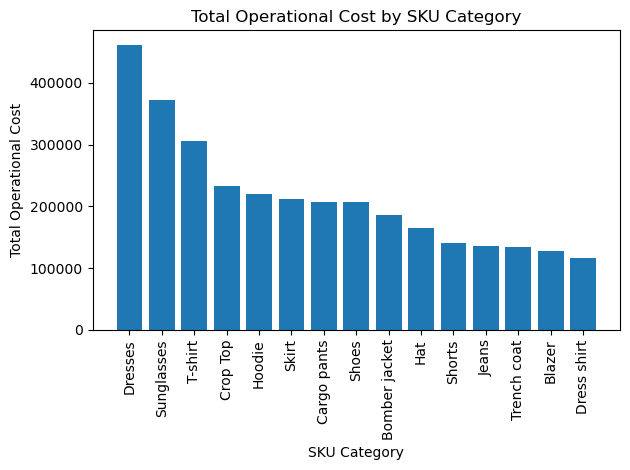

In [36]:
plt.bar(sorted_data['SKU_Category'], sorted_data['Operational_Cost'])
plt.xlabel('SKU Category')
plt.ylabel('Total Operational Cost')
plt.title('Total Operational Cost by SKU Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [85]:
doubled = data.groupby('SKU_Category').agg({'Sales_Amount': 'sum', 'Operational_Cost': 'sum'}).reset_index()
doubled['Ratio'] = doubled['Sales_Amount'] / doubled['Operational_Cost']
sorted_ratio = doubled.sort_values(by='Ratio', ascending=False)
doubled['Reversed_Ratio'] =  doubled['Operational_Cost'] / doubled['Sales_Amount']
reversed_ratio = doubled.sort_values(by='Reversed_Ratio', ascending=False)
reversed_ratio

,SKU_Category,Sales_Amount,Operational_Cost,Ratio,Reversed_Ratio
3,Crop Top,318938.4,232579.3,1.371310,0.729230
11,Skirt,297874.3,211322.1,1.409575,0.709434
12,Sunglasses,543935.1,371146.5,1.465554,0.682336
2,Cargo pants,318518.4,206020.1,1.546055,0.646808
7,Hoodie,347436.7,220025.6,1.579074,0.633283
9,Shoes,328233.7,206300.1,1.591050,0.628516
13,T-shirt,490323.3,304732.2,1.609030,0.621492
8,Jeans,218854.0,134946.4,1.621785,0.616605
0,Blazer,222557.6,126782.5,1.755428,0.569662
5,Dresses,847281.1,461049.9,1.837721,0.544152


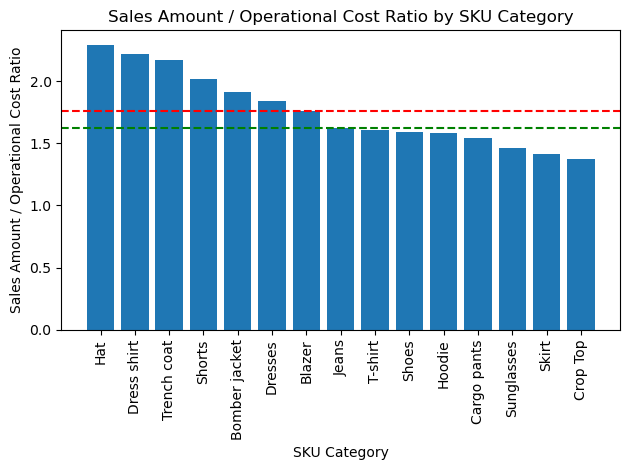

In [86]:
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(sorted_ratio['SKU_Category'], sorted_ratio['Ratio'])
plt.xlabel('SKU Category')
plt.ylabel('Sales Amount / Operational Cost Ratio')
plt.title('Sales Amount / Operational Cost Ratio by SKU Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
mean = doubled['Ratio'].mean()
mean
median = doubled['Ratio'].median()
plt.axhline(y=mean, color='red', linestyle='--', label = "mean s/o ratio")
plt.axhline(y=median, color='green', linestyle='--', label = "median s/o ratio")
# plt.text(3, 5.5, 'y=1', color='green', fontsize=12, ha='right', va='bottom')
plt.tight_layout()
plt.show()

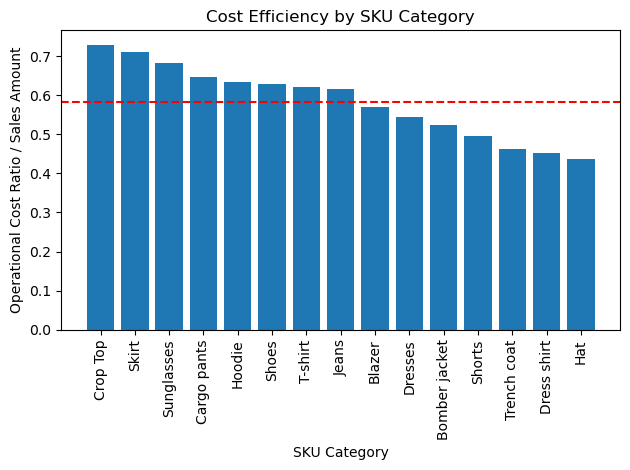

In [88]:
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(reversed_ratio['SKU_Category'], reversed_ratio['Reversed_Ratio'])
plt.xlabel('SKU Category')
plt.ylabel('Operational Cost Ratio / Sales Amount')
plt.title('Cost Efficiency by SKU Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
average = reversed_ratio['Reversed_Ratio'].mean()

plt.axhline(y=average, color='red', linestyle='--', label = "Average Cost Efficiency")
# plt.axhline(y=median, color='green', linestyle='--', label = "median s/o ratio")
# plt.text(3, 5.5, 'y=1', color='green', fontsize=12, ha='right', va='bottom')
plt.tight_layout()
plt.show()

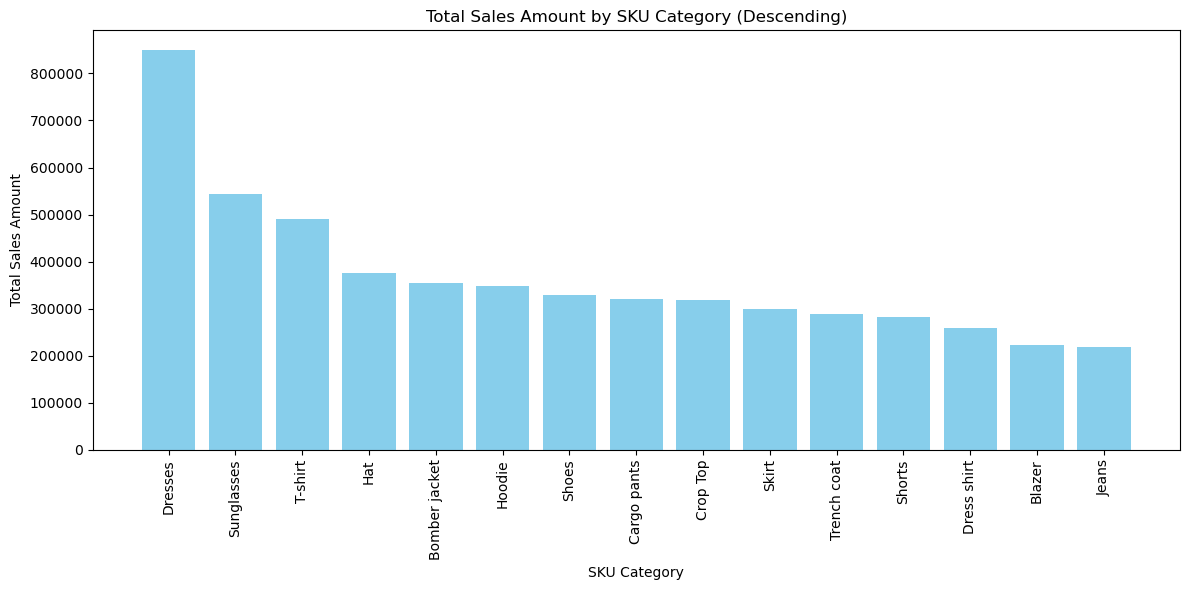

In [39]:
# Group by 'SKU_Category' and summarize 'Sales_Amount'
category_sales = data.groupby('SKU_Category')['Sales_Amount'].sum().reset_index()

# Sort the categories by 'Sales_Amount' in descending order
category_sales_sorted = category_sales.sort_values(by='Sales_Amount', ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(category_sales_sorted['SKU_Category'], category_sales_sorted['Sales_Amount'], color='skyblue')
plt.xlabel('SKU Category')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by SKU Category (Descending)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [40]:
# Specify the date format as 'DD/MM/YYYY' and handle errors by setting errors='coerce'
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

# Remove rows with invalid dates (NaT)
data = data.dropna(subset=['Date'])

# Create 'Year' and 'Month' columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Group by 'Year' and 'Month' and summarize quantities
monthly_summary = data.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Rename columns for clarity
monthly_summary = monthly_summary.rename(columns={'Year': 'Year', 'Month': 'Month', 'Quantity': 'Total_Quantity'})

# Display the monthly summary
print(monthly_summary)


    Year  Month  Total_Quantity
0   2022      1        6487.670
1   2022      2        6220.630
2   2022      3        6856.330
3   2022      4        6775.176
4   2022      5        7418.497
5   2022      6        6291.670
6   2022      7        5718.500
7   2022      8        5748.510
8   2022      9        7396.330
9   2022     10        7322.340
10  2022     11        6938.840
11  2022     12        7999.000


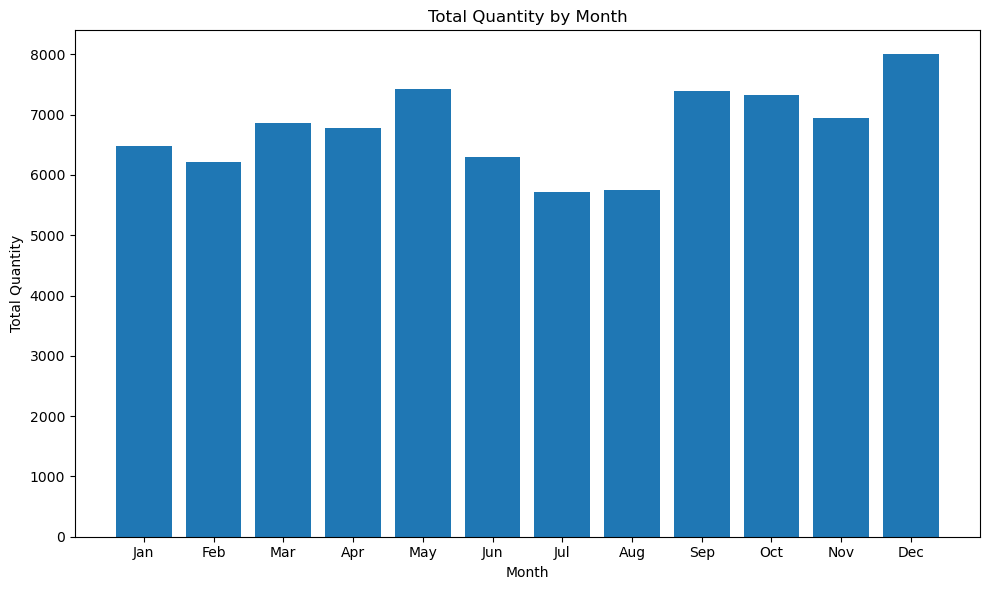

In [41]:
# Rename columns for clarity
monthly_summary = monthly_summary.rename(columns={'Year': 'Year', 'Month': 'Month', 'Quantity': 'Total_Quantity'})

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(monthly_summary['Month'], monthly_summary['Total_Quantity'])
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

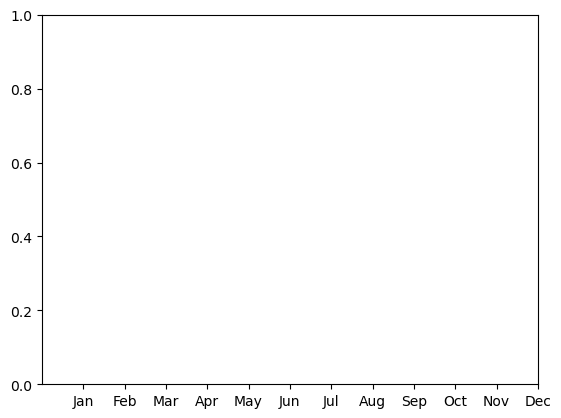

In [42]:
# Plot the data
# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
         'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = px.line(x=mon, y=monthly_summary['Total_Quantity'], title ='Total Quantity by Month')
xti = plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# fig.show()
# plt.xlabel('Month')
# plt.ylabel('Total Quantity')
# plt.title('Total Quantity by Month')
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.tight_layout()
# plt.show()

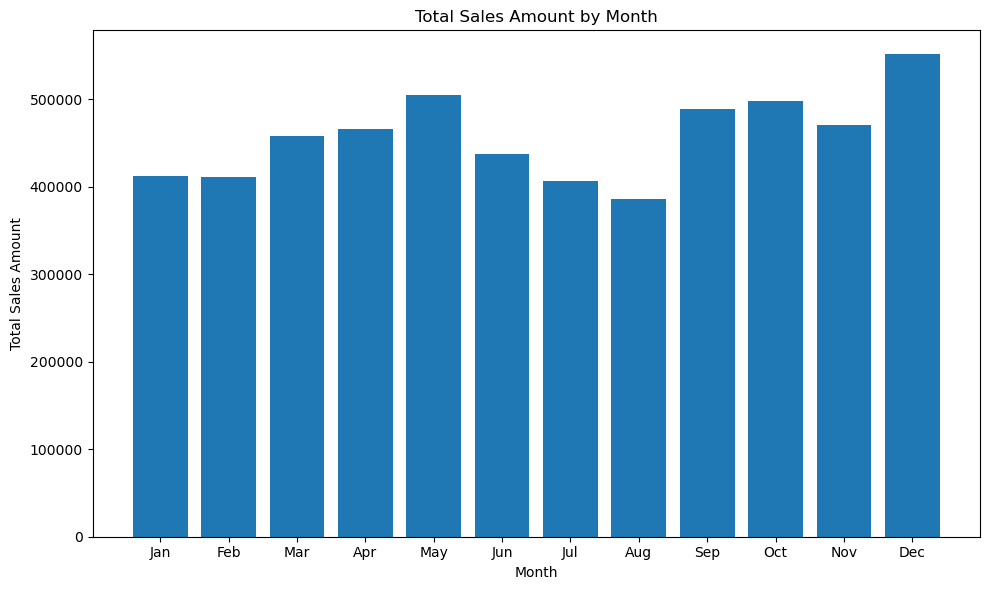

In [43]:
# Group by 'Year' and 'Month' and summarize sales amount
monthly_sales_summary = data.groupby(['Year', 'Month'])['Sales_Amount'].sum().reset_index()

# Rename columns for clarity
monthly_sales_summary = monthly_sales_summary.rename(columns={'Year': 'Year', 'Month': 'Month', 'Sales_Amount': 'Total_Sales_Amount'})
# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(monthly_sales_summary['Month'], monthly_sales_summary['Total_Sales_Amount'])
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [44]:
# Group by 'SKU_Category' and 'Month' and summarize sales amount and operational cost
skum = data.groupby(['SKU_Category', 'Year', 'Month']).agg({'Sales_Amount': 'sum', 'Operational_Cost': 'sum'}).reset_index()

# Calculate the ratio of sales amount to operational cost for each SKU_Category and month
skum['Sales_to_Cost_Ratio'] = skum['Sales_Amount'] / monthly_summary['Operational_Cost']

# Plot the data for a specific SKU_Category (replace 'Your_SKU_Category' with the actual category you want to visualize)
sku_category_to_plot = 'Your_SKU_Category'

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Filter data for the specific SKU_Category
filtered_data = monthly_summary[monthly_summary['SKU_Category'] == sku_category_to_plot]

# Plot the data for the specific SKU_Category
plt.plot(filtered_data['Month'], filtered_data['Sales_to_Cost_Ratio'], marker='o', label=f'{sku_category_to_plot} Ratio', color='b')
plt.xlabel('Month')
plt.ylabel(f'{sku_category_to_plot} Sales to Cost Ratio')
plt.title(f'{sku_category_to_plot} Sales to Cost Ratio by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Add a legend
plt.legend()

plt.tight_layout()
plt.show()

KeyError: 'Operational_Cost'

In [5]:
# Define age bins and labels
age_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]
age_labels = ['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']

# Create a new column 'Age_Group' based on the age bins
data['Age_Group'] = pd.cut(data['Customer_Age'], bins=age_bins, labels=age_labels)

# Group by 'Age_Group' and 'SKU_Category' and count occurrences
age_category_counts = data.groupby(['Age_Group', 'SKU_Category']).size().reset_index(name='Count')

# Find the top 3 SKU categories for each age group
age3_categories = age_category_counts.groupby('Age_Group').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)

# Rename columns for clarity
age3_categories = age3_categories.rename(columns={'Age_Group': 'Age Group', 'SKU_Category': 'Top SKU Categories'})

# Display the top 3 SKU categories for each age group
print(age3_categories)

   Age Group Top SKU Categories  Count
0      10-14             Blazer      0
1      10-14      Bomber jacket      0
2      10-14        Cargo pants      0
3      15-19            T-shirt    105
4      15-19             Hoodie     52
5      15-19           Crop Top     40
6      20-24            T-shirt    851
7      20-24             Shorts    423
8      20-24             Hoodie    382
9      25-29            T-shirt   1456
10     25-29        Cargo pants    686
11     25-29            Dresses    674
12     30-34            T-shirt   1481
13     30-34            Dresses    712
14     30-34             Hoodie    704
15     35-39            T-shirt   1265
16     35-39             Hoodie    673
17     35-39            Dresses    641
18     40-44            T-shirt   1422
19     40-44            Dresses    650
20     40-44             Hoodie    632
21     45-49            T-shirt   1527
22     45-49             Hoodie    724
23     45-49        Cargo pants    703
24     50-54            T

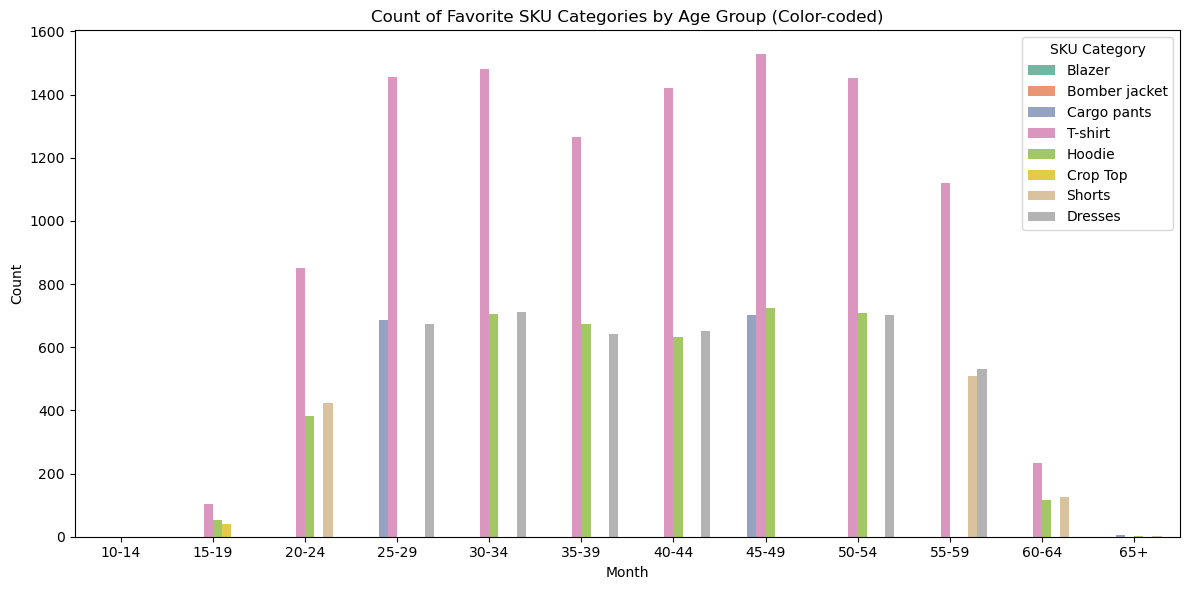

In [6]:
# Create a bar plot showing the count of "Favorite SKU Category" against month
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use Seaborn to create a bar plot with color-coded bars
sns.barplot(data=age3_categories, x='Age Group', y='Count', hue='Top SKU Categories', palette='Set2')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Favorite SKU Categories by Age Group (Color-coded)')

# Set the legend
plt.legend(title='SKU Category', title_fontsize=10)

# Set x-axis labels to month names (Jan, Feb, Mar, etc.)
# plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
# Define age bins and labels
age_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]
age_labels = ['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']

# Create a new column 'Age_Group' based on the age bins
data['Age_Group'] = pd.cut(data['Customer_Age'], bins=age_bins, labels=age_labels)

# Group by 'Age_Group' and calculate the total sale amount for each age group
age_sale_amount = data.groupby('Age_Group')['Sales_Amount'].sum().reset_index()

# Rename columns for clarity
age_sale_amount = age_sale_amount.rename(columns={'Age_Group': 'Age Group', 'Sales_Amount': 'Total Sale Amount'})

# Display the total sale amount for each age group
print(age_sale_amount)

   Age Group  Total Sale Amount
0      10-14                0.0
1      15-19            44540.8
2      20-24           433772.7
3      25-29           716092.6
4      30-34           778354.1
5      35-39           707662.6
6      40-44           710011.0
7      45-49           734094.4
8      50-54           720648.7
9      55-59           550041.6
10     60-64           107821.9
11       65+             1310.0


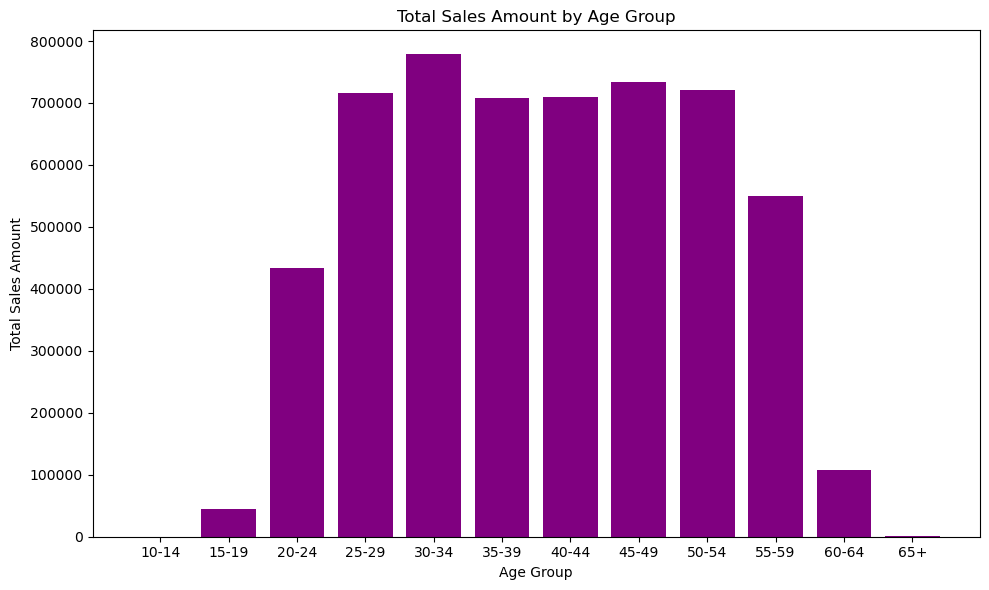

In [9]:
# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(age_sale_amount['Age Group'], age_sale_amount['Total Sale Amount'], color='purple')
# sns.barplot(data=age_sale_amount, x='Month', y='Count', hue='Favorite SKU Category', palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Age Group')
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
####

# # Use Seaborn to create a bar plot with color-coded bars
# sns.barplot(data=top_3_categories, x='Month', y='Count', hue='Favorite SKU Category', palette='Set2')

# # Set labels and title
# plt.xlabel('Month')
# plt.ylabel('Count')
# plt.title('Count of Favorite SKU Categories by Month (Color-coded)')

# # Set the legend
# plt.legend(title='Favorite SKU Category', title_fontsize=10)

# # Set x-axis labels to month names (Jan, Feb, Mar, etc.)
# plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# # Show the plot
# plt.tight_layout()
# plt.show()


In [65]:
# Define age bins and labels
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']

# Create a new column 'Age_Group' based on the age bins
data['Age_Group'] = pd.cut(data['Customer_Age'], bins=age_bins, labels=age_labels)

# Group by 'Age_Group' and calculate the total sale amount for each age group
age_count = data.groupby('Age_Group')['Quantity'].sum().reset_index()

# Rename columns for clarity
age_count = age_count.rename(columns={'Age_Group': 'Age Group', 'Sales_Amount': 'Total Sale Amount'})

# Display the total sale amount for each age group
print(age_count)

  Age Group   Quantity
0     20-24   6500.340
1     25-29  10599.340
2     30-34  11400.667
3     35-39  10003.310
4     40-44  10349.300
5     45-49  10932.330
6     50-54  10638.536
7     55-59   8354.670
8     60-64   1700.000
9       65+     23.000


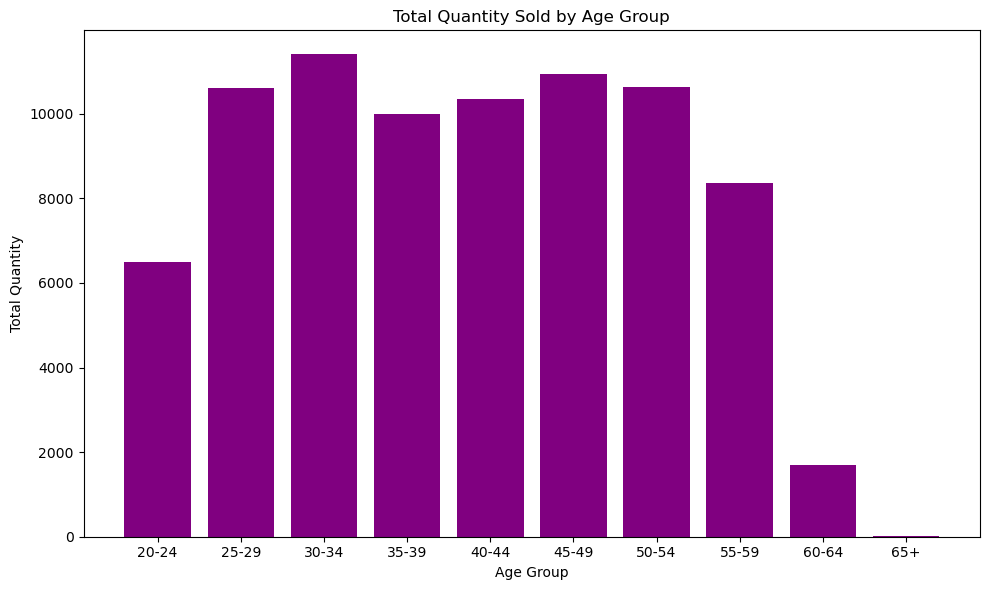

In [68]:
# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(age_count['Age Group'], age_count['Quantity'], color="purple")
# sns.barplot(data=age_sale_amount, x='Month', y='Count', hue='Favorite SKU Category', palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Sold by Age Group')
# plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
####

In [45]:
# Group by 'Year', 'Month', and 'SKU_Category' and count occurrences
monthly_category_counts = data.groupby(['Year', 'Month', 'SKU_Category']).size().reset_index(name='Counts')

# Sort the data within each month by counts in descending order
monthly_category_counts.sort_values(['Year', 'Month', 'Counts'], ascending=[True, True, False], inplace=True)

# Get the top 3 favorite 'SKU_Category' for each month
top_3_categories = monthly_category_counts.groupby(['Year', 'Month']).head(3).reset_index(drop=True)

# Rename columns for clarity
top_3_categories = top_3_categories.rename(columns={'Year': 'Year', 'Month': 'Month', 'SKU_Category': 'Favorite SKU Category', 'Counts': 'Count'})

# Display the top 3 favorite categories for each month
print(top_3_categories)

    Year  Month Favorite SKU Category  Count
0   2022      1               T-shirt    861
1   2022      1           Cargo pants    421
2   2022      1                Hoodie    418
3   2022      2               T-shirt    885
4   2022      2           Cargo pants    453
5   2022      2                 Skirt    432
6   2022      3               T-shirt    951
7   2022      3           Cargo pants    486
8   2022      3                Hoodie    465
9   2022      4               T-shirt    922
10  2022      4                Hoodie    436
11  2022      4               Dresses    424
12  2022      5               T-shirt    928
13  2022      5               Dresses    465
14  2022      5                Hoodie    447
15  2022      6               T-shirt    819
16  2022      6               Dresses    453
17  2022      6                Shorts    372
18  2022      7               T-shirt    851
19  2022      7               Dresses    368
20  2022      7                Shorts    357
21  2022  

In [46]:
top_3_categories

,Year,Month,Favorite SKU Category,Count
0,2022,1,T-shirt,861
1,2022,1,Cargo pants,421
2,2022,1,Hoodie,418
3,2022,2,T-shirt,885
4,2022,2,Cargo pants,453
5,2022,2,Skirt,432
6,2022,3,T-shirt,951
7,2022,3,Cargo pants,486
8,2022,3,Hoodie,465
9,2022,4,T-shirt,922


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


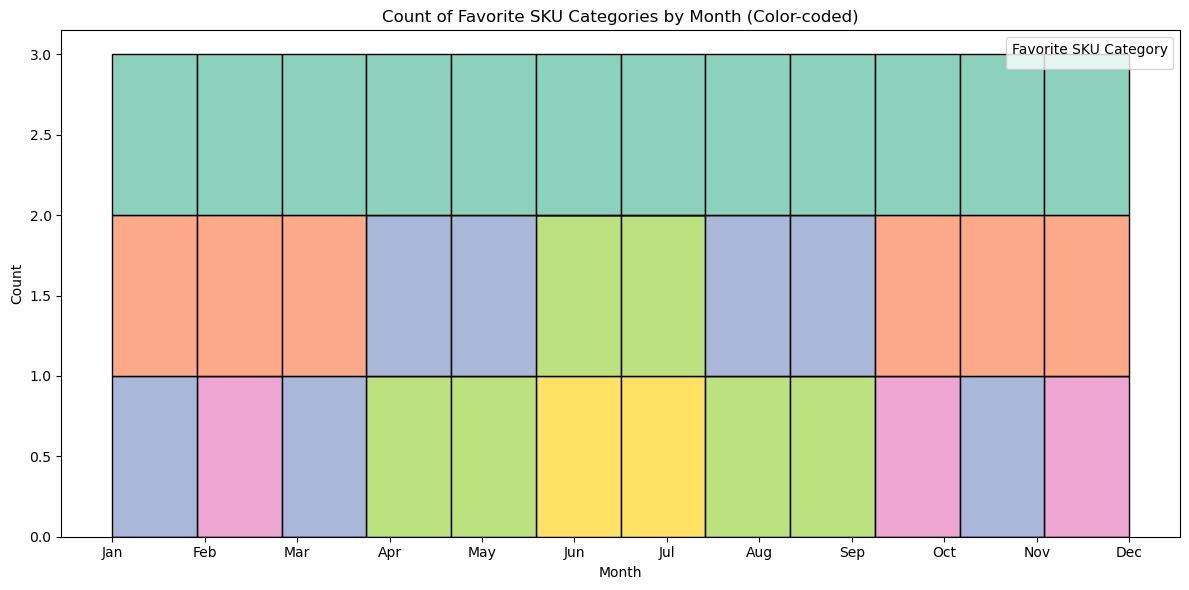

In [47]:
# Plot the count of "Favorite SKU Category" against month with color-coding
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.histplot(data=top_3_categories, x='Month', hue='Favorite SKU Category', multiple='stack', bins=12, palette='Set2')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Favorite SKU Categories by Month (Color-coded)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Favorite SKU Category', title_fontsize=10)
plt.tight_layout()
plt.show()

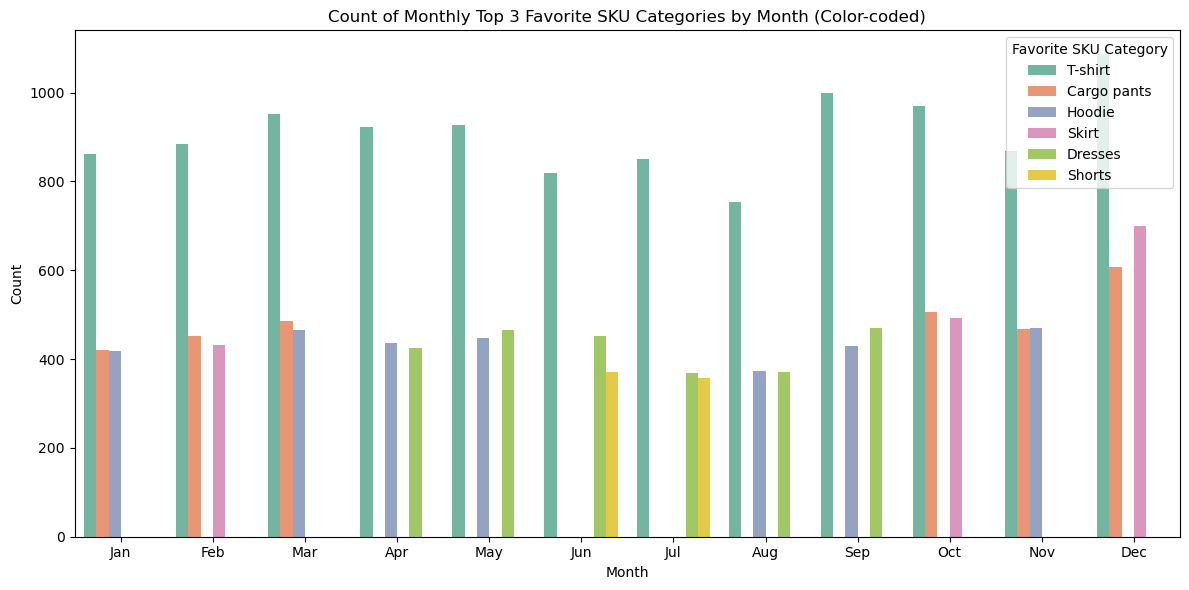

In [79]:

# Create a bar plot showing the count of "Favorite SKU Category" against month
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use Seaborn to create a bar plot with color-coded bars
sns.barplot(data=top_3_categories, x='Month', y='Count', hue='Favorite SKU Category', palette='Set2')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Monthly Top 3 Favorite SKU Categories by Month (Color-coded)')

# Set the legend
plt.legend(title='Favorite SKU Category', title_fontsize=10)

# Set x-axis labels to month names (Jan, Feb, Mar, etc.)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
# Group by 'Year', 'Month', and 'SKU_Category' and count occurrences
monthly_category_counts2 = data.groupby(['Year', 'Month', 'SKU_Category']).size().reset_index(name='Counts')

# Sort the data within each month by counts in descending order
monthly_category_counts2.sort_values(['Year', 'Month', 'Counts'], ascending=[True, True, True], inplace=True)

# Get the bottom 4 favorite 'SKU_Category' for each month
bot_4_categories = monthly_category_counts2.groupby(['Year', 'Month']).head(4).reset_index(drop=True)

# Rename columns for clarity
bot_4_categories = bot_4_categories.rename(columns={'Year': 'Year', 'Month': 'Month', 'SKU_Category': 'Least Favorite SKU Category', 'Counts': 'Count'})

# Display the bottom 4 favorite categories for each month
print(bot_4_categories)

    Year  Month Least Favorite SKU Category  Count
0   2022      1                 Trench coat    181
1   2022      1               Bomber jacket    193
2   2022      1                       Shoes    202
3   2022      1                  Sunglasses    204
4   2022      2                 Trench coat    139
5   2022      2                       Shoes    188
6   2022      2               Bomber jacket    189
7   2022      2                    Crop Top    197
8   2022      3               Bomber jacket    190
9   2022      3                 Trench coat    193
10  2022      3                    Crop Top    217
11  2022      3                       Jeans    218
12  2022      4                       Jeans    209
13  2022      4                 Trench coat    221
14  2022      4               Bomber jacket    223
15  2022      4                 Dress shirt    229
16  2022      5                  Sunglasses    239
17  2022      5                 Trench coat    240
18  2022      5               B

<Figure size 1200x600 with 0 Axes>

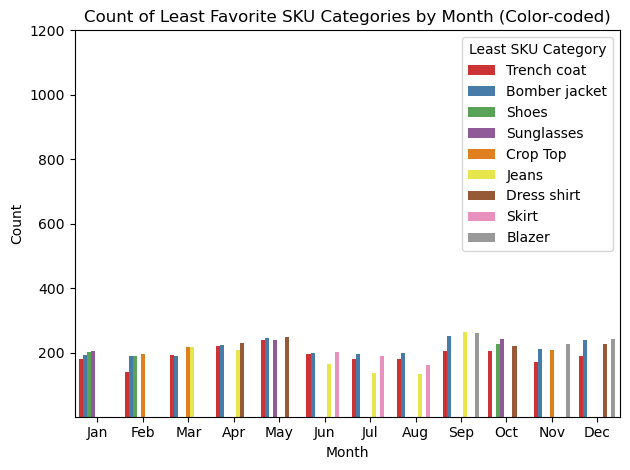

In [76]:
# Create a bar plot showing the count of "Favorite SKU Category" against month
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

fig, ax = plt.subplots()

# Use Seaborn to create a bar plot with color-coded bars
fig = sns.barplot(data=bot_4_categories, ax=ax, x='Month', y='Count', hue='Least Favorite SKU Category', palette='Set1')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Least Favorite SKU Categories by Month (Color-coded)')

# Set the legend
plt.legend(title='Least SKU Category', title_fontsize=10)

# Set x-axis labels to month names (Jan, Feb, Mar, etc.)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#Set y-axis limit
ax.set_ylim(1, 1200)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
# Calculate net income (sales_amount - operational_cost)
data['Net_Income'] = data['Sales_Amount'] - data['Operational_Cost']

# Group by 'Year' and 'Month' and calculate the total net income for each month
monthly_net_income = data.groupby(['Year', 'Month'])['Net_Income'].sum().reset_index()

# Rename columns for clarity
monthly_net_income = monthly_net_income.rename(columns={'Year': 'Year', 'Month': 'Month', 'Net_Income': 'Total Net Income'})

# Display the total net income by month
print(monthly_net_income)

    Year  Month  Total Net Income
0   2022      1          176839.6
1   2022      2          167543.9
2   2022      3          187784.8
3   2022      4          193769.6
4   2022      5          214785.4
5   2022      6          183257.1
6   2022      7          168619.3
7   2022      8          163638.1
8   2022      9          205008.9
9   2022     10          201999.4
10  2022     11          193400.0
11  2022     12          222414.4


NameError: name 'false' is not defined

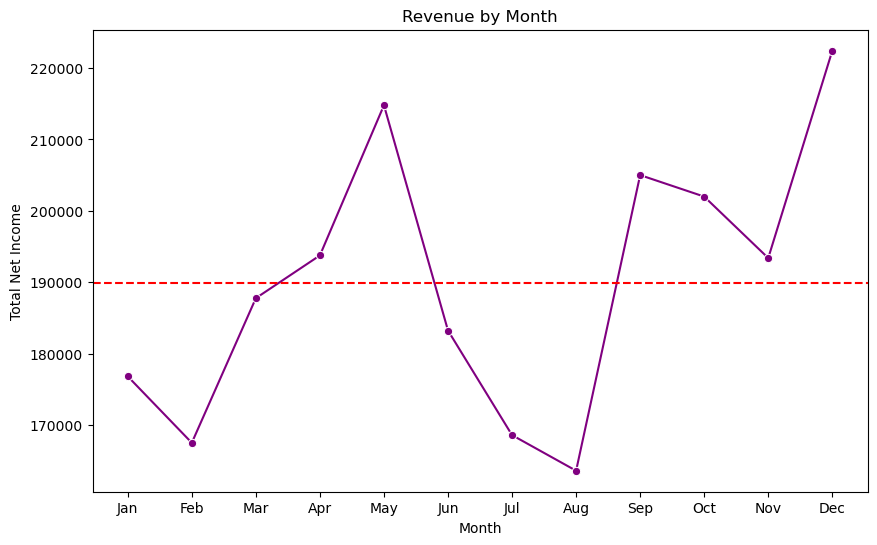

In [94]:
# Plot monthly net income against month as a line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Use Seaborn to create a line plot
ax=sns.lineplot(data=monthly_net_income, x='Month', y='Total Net Income', marker='o', color='purple')

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Total Net Income')
plt.title('Revenue by Month')

# Set x-axis labels to month names (Jan, Feb, Mar, etc.)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

mean = monthly_net_income['Total Net Income'].mean()
plt.axhline(y=mean, color='red', linestyle='--', label = "Average Revenue")

# Show the plot
plt.grid(false)
plt.legend(title='Average Revenue', title_fontsize=10)
plt.tight_layout()
plt.show()


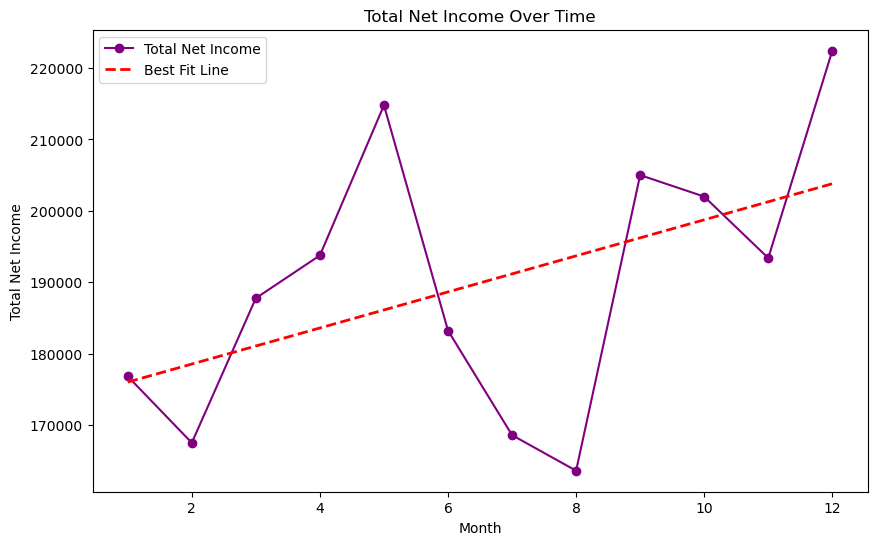

In [95]:
# Group by 'Year' and 'Month' and calculate the total net income for each month
monthly_net_income = data.groupby(['Year', 'Month'])['Net_Income'].sum().reset_index()

# Rename columns for clarity
monthly_net_income = monthly_net_income.rename(columns={'Year': 'Year', 'Month': 'Month', 'Net_Income': 'Total Net Income'})

# Calculate the line of best fit
z = np.polyfit(monthly_net_income['Month'], monthly_net_income['Total Net Income'], 1)
p = np.poly1d(z)

# Plot the total net income against month
plt.figure(figsize=(10, 6))
plt.plot(monthly_net_income['Month'], monthly_net_income['Total Net Income'], marker='o', linestyle='-', color='purple', label='Total Net Income')
plt.plot(monthly_net_income['Month'], p(monthly_net_income['Month']), 'r--', label='Best Fit Line', linewidth=2)

plt.title('Total Net Income Over Time')
plt.xlabel('Month')
plt.ylabel('Total Net Income')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Calculate net income (sales_amount - operational_cost)
data['Net_Income'] = data['Sales_Amount'] - data['Operational_Cost']

# Group by 'SKU_Category' and calculate the total net income for each category
category_net_income = data.groupby('SKU_Category')['Net_Income'].sum().reset_index()

# Rename columns for clarity
category_net_income = category_net_income.rename(columns={'SKU_Category': 'SKU Category', 'Net_Income': 'Total Net Income'})

# Sort the DataFrame by 'Total Net Income' in descending order
category_net_income = category_net_income.sort_values(by='Total Net Income', ascending=False)

# Display the total net income by SKU category
print(category_net_income)

     SKU Category  Total Net Income
5         Dresses          386231.2
6             Hat          211933.6
13        T-shirt          185591.1
12     Sunglasses          172788.6
1   Bomber jacket          168721.8
14    Trench coat          155600.7
10         Shorts          142008.6
4     Dress shirt          141747.9
7          Hoodie          127411.1
9           Shoes          121933.6
2     Cargo pants          112498.3
0          Blazer           95775.1
11          Skirt           86552.2
3        Crop Top           86359.1
8           Jeans           83907.6


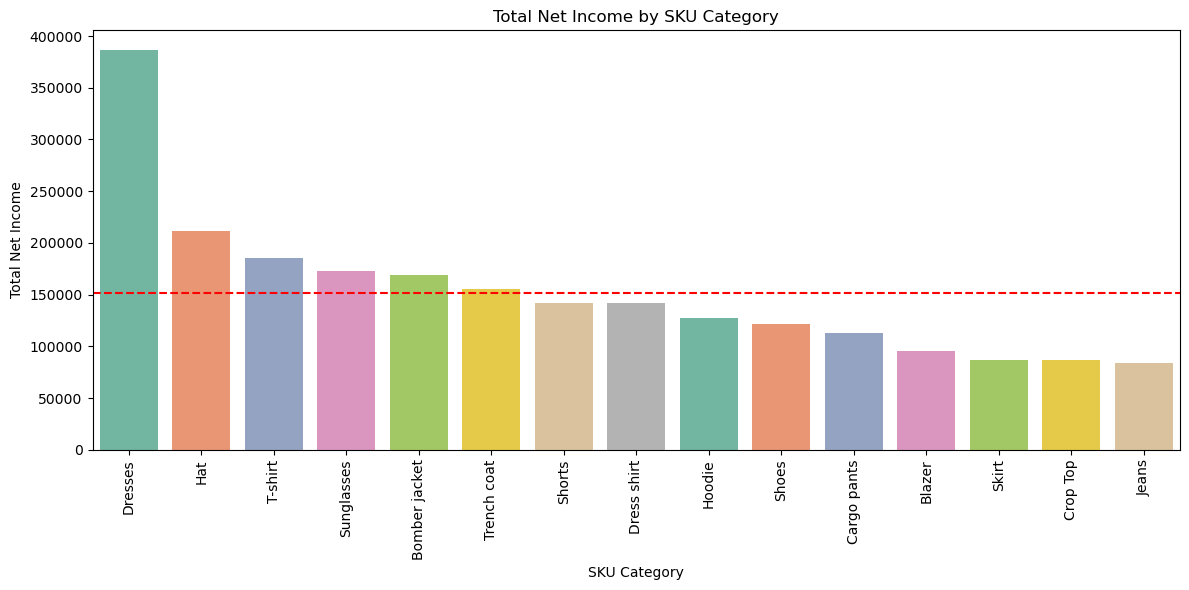

In [ ]:
# Plot net income against SKU categories as a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use Seaborn to create a bar plot
sns.barplot(data=category_net_income, x='SKU Category', y='Total Net Income', palette='Set2')

# Set labels and title
plt.xlabel('SKU Category')
plt.ylabel('Total Net Income')
plt.title('Total Net Income by SKU Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

mean = category_net_income['Total Net Income'].mean()
plt.axhline(y=mean, color='red', linestyle='--', label = "mean s/o ratio")



# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate net income (sales_amount - operational_cost)
data['Net_Income'] = data['Sales_Amount'] - data['Operational_Cost']

# Group by 'SKU_Category' and calculate total net income and total quantity sold
sku_category_summary = data.groupby('SKU_Category').agg({'Net_Income': 'sum', 'Quantity': 'sum'}).reset_index()

# Rename columns for clarity
sku_category_summary = sku_category_summary.rename(columns={'SKU_Category': 'SKU Category', 'Net_Income': 'Total Net Income', 'Quantity': 'Total Quantity Sold'})

# Calculate unit profit (Total Net Income / Total Quantity Sold)
sku_category_summary['Unit Profit'] = sku_category_summary['Total Net Income'] / sku_category_summary['Total Quantity Sold']

# Display the SKU category summary with unit profit
print(sku_category_summary)

     SKU Category  Total Net Income  Total Quantity Sold  Unit Profit
0          Blazer           95775.1             3783.000    25.317235
1   Bomber jacket          168721.8             3541.000    47.648066
2     Cargo pants          112498.3             5193.000    21.663451
3        Crop Top           86359.1             3346.000    25.809653
4     Dress shirt          141747.9             5586.500    25.373293
5         Dresses          386231.2             8190.383    47.156671
6             Hat          211933.6             8100.000    26.164642
7          Hoodie          127411.1             5613.000    22.699287
8           Jeans           83907.6             3071.000    27.322566
9           Shoes          121933.6             3335.000    36.561799
10         Shorts          142008.6             7931.840    17.903614
11          Skirt           86552.2             4625.000    18.713989
12     Sunglasses          172788.6             3874.670    44.594404
13        T-shirt   

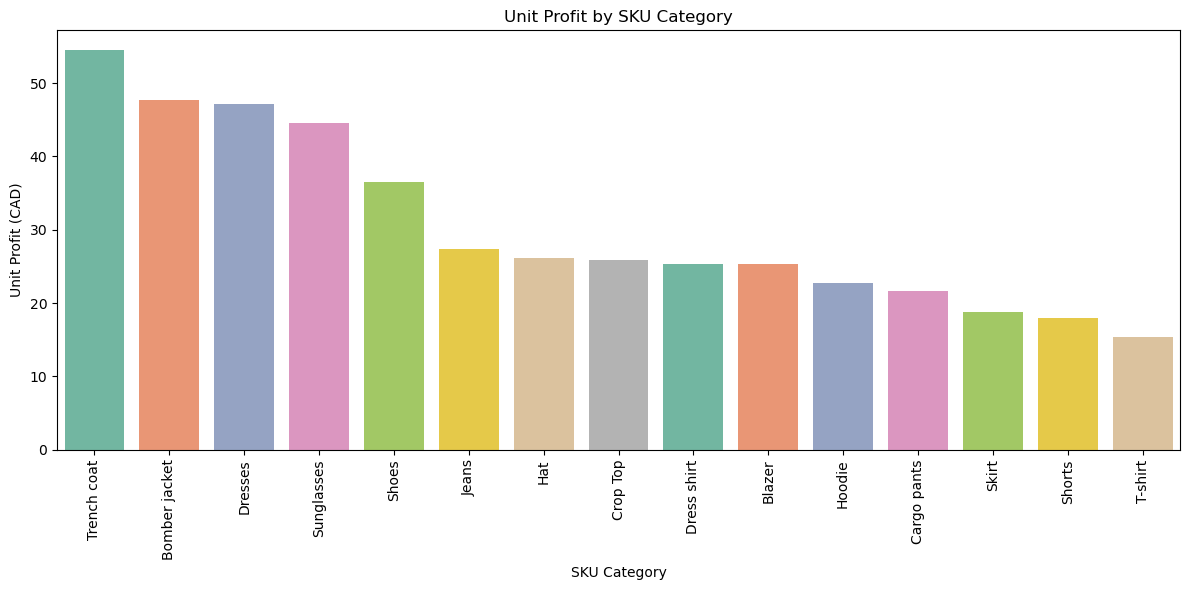

In [ ]:
# Sort the DataFrame by 'Unit Profit' in descending order
sku_category_summary = sku_category_summary.sort_values(by='Unit Profit', ascending=False)

# Create a bar plot of unit profit against SKU categories
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use Seaborn to create a bar plot with color-coded bars
sns.barplot(data=sku_category_summary, x='SKU Category', y='Unit Profit', palette='Set2')

# Set labels and title
plt.xlabel('SKU Category')
plt.ylabel('Unit Profit (CAD)')
plt.title('Unit Profit by SKU Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()